# Notebook: 05_evaluation.ipynb

In [18]:
import os
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [21]:
# Create directory for saving plots
plot_dir = "../results/plots"
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)


In [3]:
# Load test data
test_data_path = "../data/processed/X_test.csv"
y_test_path = "../data/processed/y_test.csv"
X_test = pd.read_csv(test_data_path)
y_test = pd.read_csv(y_test_path).values.ravel()


In [4]:
# Load trained models
model_paths = {
    "Logistic Regression": "../models/saved_models/logisticregression_best.pkl",
    "Naïve Bayes": "../models/saved_models/naivebayes_best.pkl",
    "Random Forest": "../models/saved_models/randomforest_best.pkl",
    "Linear SVC": "../models/saved_models/linearsvc_best.pkl"
}


In [5]:
# Store results
model_results = {}


Evaluating: Logistic Regression


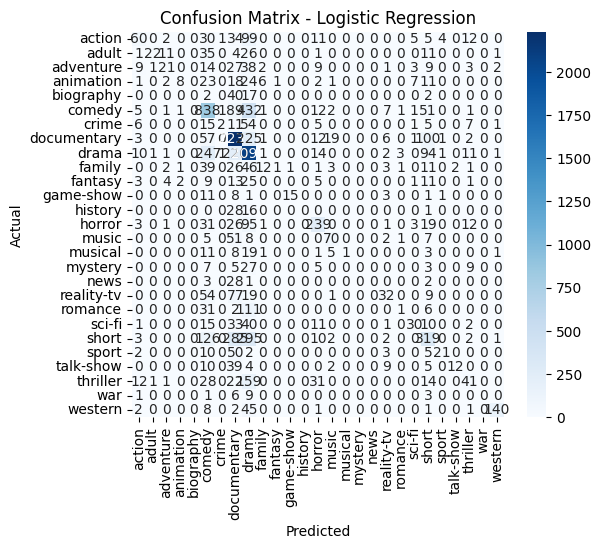

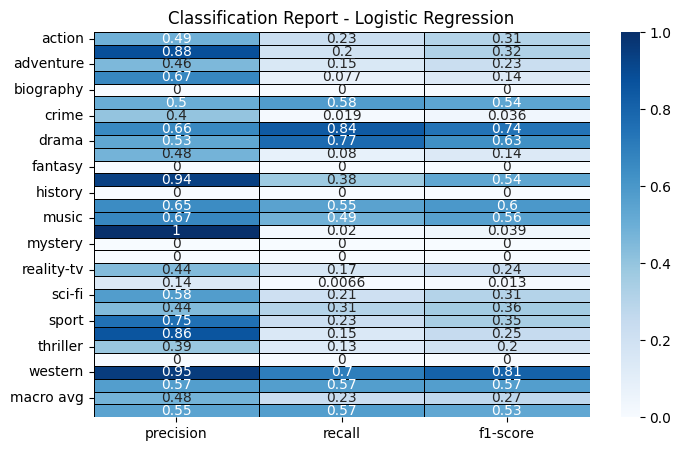

Evaluating: Naïve Bayes


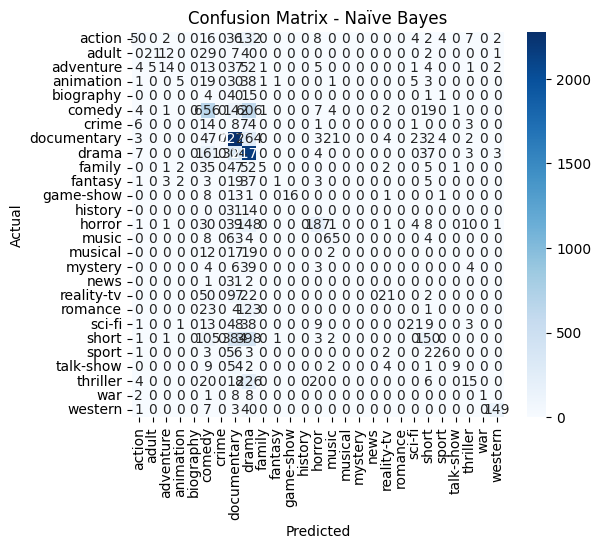

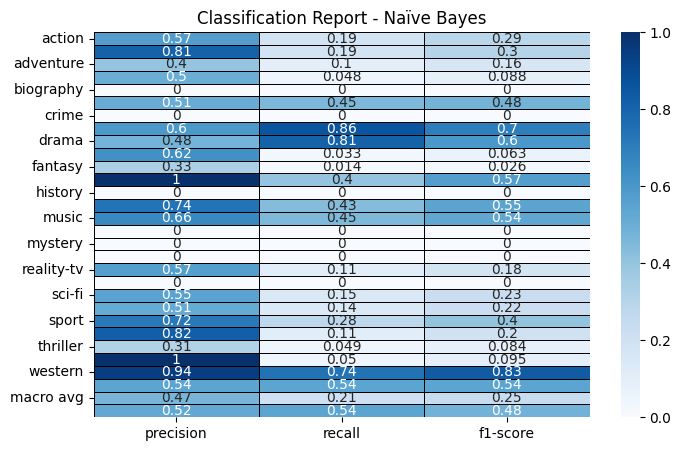

Evaluating: Random Forest


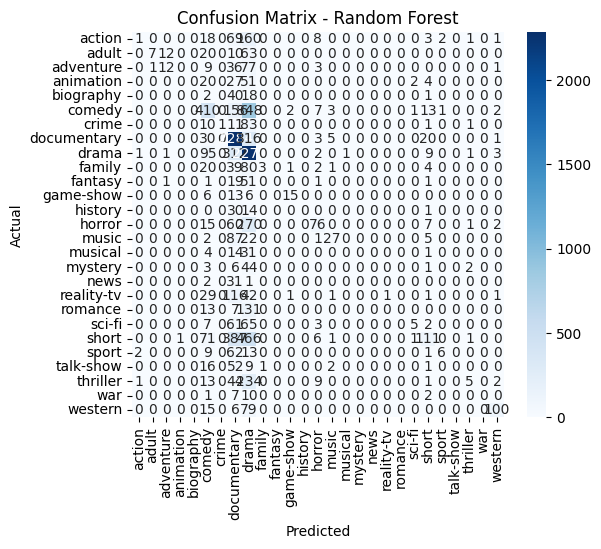

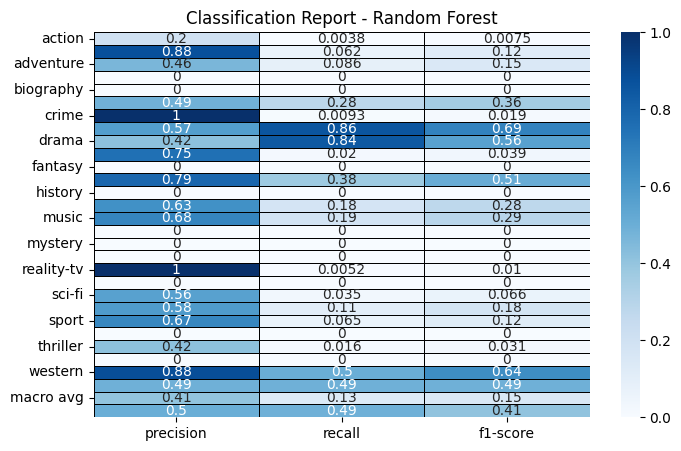

Evaluating: Linear SVC


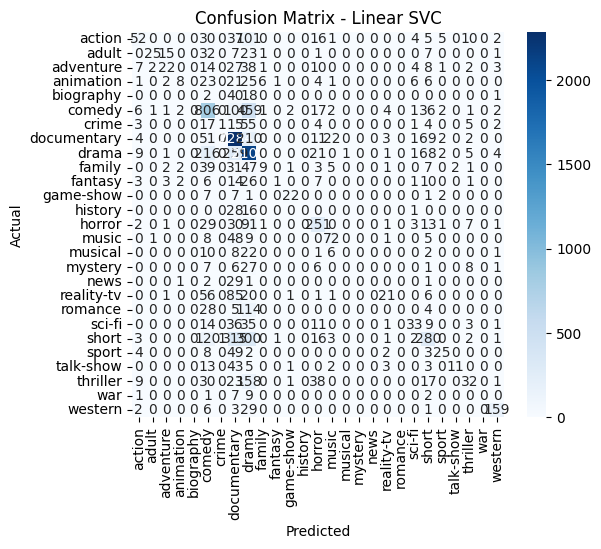

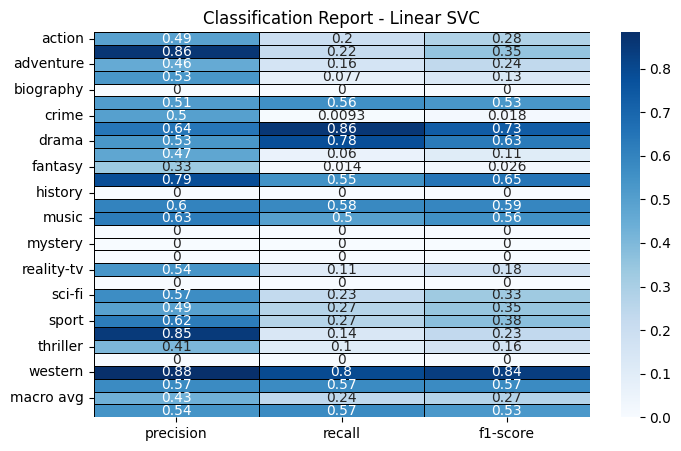

In [23]:
# Evaluate each model
for model_name, path in model_paths.items():
    print(f"Evaluating: {model_name}")
    model = joblib.load(path)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    model_results[model_name] = {
        "accuracy": acc,
        "classification_report": class_report,
        "confusion_matrix": conf_matrix
    }
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.savefig(os.path.join(plot_dir, f"confusion_matrix_{model_name}.png"))
    plt.show()
    
    # Plot Classification Report as Heatmap
    class_report_df = pd.DataFrame(class_report).iloc[:-1, :].T  # Exclude support row
    plt.figure(figsize=(8, 5))
    sns.heatmap(class_report_df, annot=True, cmap="Blues", linewidths=0.5, linecolor='black')
    plt.title(f"Classification Report - {model_name}")
    plt.savefig(f"{plot_dir}/classification_report_{model_name}.png")
    plt.show()


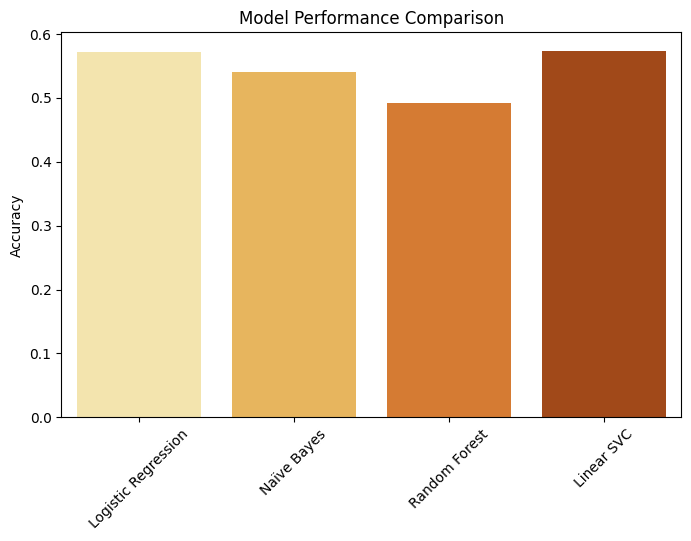

Evaluation Complete! 🚀


In [24]:
# Compare Model Performance
plt.figure(figsize=(8, 5))
accuracies = [model_results[m]["accuracy"] for m in model_paths.keys()]

sns.barplot(x=list(model_paths.keys()), y=accuracies, hue=list(model_paths.keys()), dodge=False, palette="YlOrBr")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.legend([],[], frameon=False)  # Hide legend
plt.savefig(os.path.join(plot_dir, "model_performance_comparison.png"))
plt.show()


print("Evaluation Complete! 🚀")
